In [2]:
#Kaksinkertaista eksponentiaalista tasoitusta kutsutaan myös Holtin malliksi.
#Kaksinkertainen eksponentiaalinen tasoitus sopii aikasarjoille, joissa on trendi, mutta ei havaittavaa kausivaihtelua. Eksponentiaalisen tasoituksen mallit (yksinkertainen, kaksinkertainen ja kolminkertainen) ovat erityisen suosittuja liiketaloudessa kysynnän ennustamisessa. Mallit ovat helppokäyttöisiä, nopeasti laskettavissa ja helposti päivitettävissä uusien havaintojen myötä.
#Eksponentiaalinen tasoitus löytyy statsmodels.tsa-kirjastosta.
#Huomaa, että tässä esimerkissä kaksinkertainen eksoponentiaalinen tasoitus ei ole hyvä malli, koska aikasarjassa on selkeä kausivaihtelu, jonka malli jättää huomiotta!
import pandas as pd
import matplotlib.pyplot as plt

from statsmodels.tsa.api import ExponentialSmoothing

import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-whitegrid')
%matplotlib inline

In [3]:
df=pd.read_csv('http://taanila.fi/Electric_Production.csv')
df.index=pd.to_datetime(df['DATE'],format='%m/%d/%Y')
df=df.drop('DATE',axis=1)
df.head()

,IPG2211A2N
DATE,
1985-01-01,72.5052
1985-02-01,70.6720
1985-03-01,62.4502
1985-04-01,57.4714
1985-05-01,55.3151


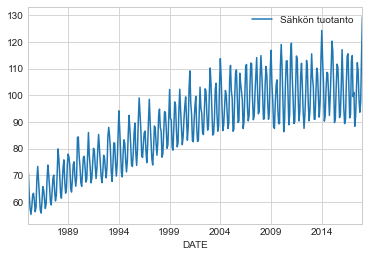

In [4]:
df = df.rename(columns = {'IPG2211A2N': 'Sähkön tuotanto'})
df.plot()

In [5]:
#Mallin sovitus
#Ennustemalli sovitetaan (fit()) dataan. Tuloksena saadaan olio (tässä olen antanut oliolle nimeksi malli), joka sisältää monenlaista tietoa mallista.
#Trendiin (trend) käytän summamallia (add), jossa trendi on aikasarjaan lisättävä termi. Tämä on suositeltavin vaihtoehto.
#freq-parametrille käytän arvoa 'MS', koska kyseessä on kuukauden 1. päivä. Lisätietoa freq-parametrin mahdollisista arvoista https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases
malli = ExponentialSmoothing(df['Sähkön tuotanto'], trend = 'add', freq='MS').fit()

In [6]:
# malli-olion avulla saan mallin mukaan simuloidut ennusteet (fittedvalues) jo toteutuneille ajankohdille
df['Ennuste'] = malli.fittedvalues
df

,Sähkön tuotanto,Ennuste
DATE,,
1985-01-01,72.5052,72.505290
1985-02-01,70.6720,72.648887
1985-03-01,62.4502,70.815687
1985-04-01,57.4714,62.593887
1985-05-01,55.3151,57.615087
...,...,...
2017-09-01,98.6154,109.074887
2017-10-01,93.6137,98.759087
2017-11-01,97.3359,93.757387


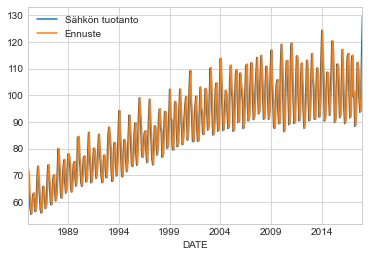

In [7]:
# Alkuperäinen aikasarja ja mallin mukaiset ennusteet samaan kaavioon
df.plot()

In [8]:
# Ennustevirheet (residuaalit) löytyvät malli-oliosta
df['Ennustevirhe'] = malli.resid
df

,Sähkön tuotanto,Ennuste,Ennustevirhe
DATE,,,
1985-01-01,72.5052,72.505290,-0.000090
1985-02-01,70.6720,72.648887,-1.976887
1985-03-01,62.4502,70.815687,-8.365487
1985-04-01,57.4714,62.593887,-5.122487
1985-05-01,55.3151,57.615087,-2.299987
...,...,...,...
2017-09-01,98.6154,109.074887,-10.459487
2017-10-01,93.6137,98.759087,-5.145387
2017-11-01,97.3359,93.757387,3.578513


Text(0, 0.5, 'Ennustevirhe')

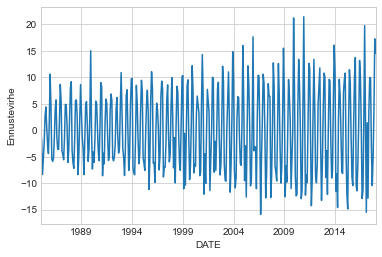

In [9]:
#Mallin tarkastelu
#Mallin hyvyyden tarkasteluun on monia tapoja. Tässä käytän
#ennustevirheiden aikasarjaa viivakaaviona
#ennusteiden ja toteutuneiden arvojen hajontakaaviota
#malliin liittyvää statistiikkaa, jonka saan summary()-toiminnolla.
#Huomaa erityisesti SSE (sum of squared errors). Mallia laskeva algoritmi yrittää saada SSE:n mahdollisimman pieneksi.
# Ennustevirheet aikasarjana
# On hyvä, jos ennustevirheiden aikasarjan vaihtelu on sattumanvaraista
df['Ennustevirhe'].plot()
plt.ylabel('Ennustevirhe')

Text(0, 0.5, 'Toteutunut kysyntä')

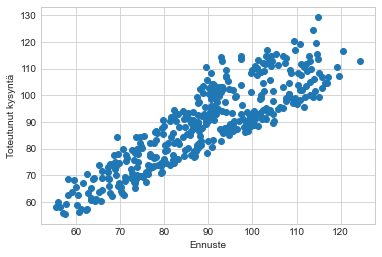

In [10]:
# Ennusteiden ja toteutuneiden kysyntöjen hajontakaavio
# Ennustemalli on sitä parempi, mitä paremmin pisteet seuraavat suoraa viivaa
# vasemmasta alakulmasta oikeaan yläkulmaan
plt.scatter(x = df['Ennuste'], y = df['Sähkön tuotanto'])
plt.xlabel('Ennuste')
plt.ylabel('Toteutunut kysyntä')

In [11]:
malli.summary()

Dep. Variable:,endog,No. Observations:,397
Model:,ExponentialSmoothing,SSE,23813.444
Optimized:,True,AIC,1633.346
Trend:,Additive,BIC,1649.281
Seasonal:,None,AICC,1633.561
Seasonal Periods:,None,Date:,"Fri, 15 Jan 2021"
Box-Cox:,False,Time:,16:07:04
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,1.0000000,alpha,True
smoothing_slope,0.000000,beta,True


In [12]:
#Ennusteiden laskeminen
#Ennustettavien ajankohtien aikaleimojen määrittämiseksi:
#Ensimmäisen ennustettavan ajankohdan aikaleiman täytyy olla aikasarjan viimeisintä aikaleimaa seuraava aikaleima.
#Ennustettavien ajankohtien lukumäärän voin määrittää periods-parametrilla.
#Ennustettavien ajankohtien frekvenssin on oltava sama kuin mallia sovitettaessa käytetty freq-parametrin arvo.
#Lisätietoa freq-parametrin mahdollisista arvoista https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases
#Tarkistan viimeisen aikaleiman
df.tail()

,Sähkön tuotanto,Ennuste,Ennustevirhe
DATE,,,
2017-09-01,98.6154,109.074887,-10.459487
2017-10-01,93.6137,98.759087,-5.145387
2017-11-01,97.3359,93.757387,3.578513
2017-12-01,114.7212,97.479587,17.241613
2018-01-01,129.4048,114.864887,14.539913


In [13]:
# Ennustettavien ajankohtien aikaleimat (alkupäivänä aikasarjan viimeistä aikaleimaa seuraava aikaleima)
index = pd.date_range('2018-02-01', periods = 12, freq = 'MS')

# Ennusteet kahdeksalle vuosineljännekselle
ennusteet = malli.forecast(12)

# Ennusteet dataframeen
df_ennuste = pd.DataFrame(data = ennusteet, index = index, 
                          columns = ['Ennuste'])
df_ennuste

,Ennuste
2018-02-01,129.548487
2018-03-01,129.692174
2018-04-01,129.835861
2018-05-01,129.979548
2018-06-01,130.123236
2018-07-01,130.266923
2018-08-01,130.410610
2018-09-01,130.554297
2018-10-01,130.697984
2018-11-01,130.841671


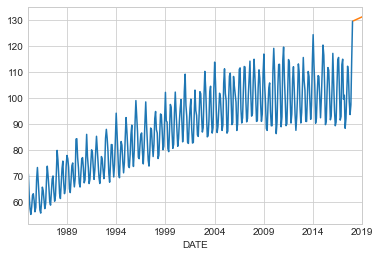

In [14]:
# Viivakaavio havainnoista
df['Sähkön tuotanto'].plot()

# Ennusteet kaavioon
df_ennuste['Ennuste'].plot()

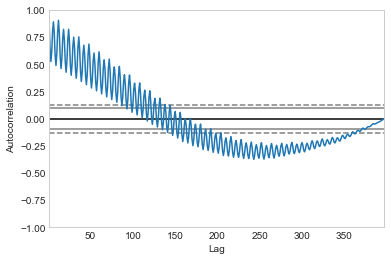

In [16]:
#Aikasarjassa on erotettavissa selkeä jaksoissa toistuva kausivaihtelu, jota kaksinkertainen eksponentiaalinen tasoitus ei huomioi ennusteessa. Asiaa voin tarkastella myös autokorrelaatioiden avulla. Autokorrelaatio tarkoittaa aikasarjan korrelaatiota viivästetyn aikasarjan kanssa, esimerkiksi aikasarjan korrelaatio neljänkymmenen päivän takaisiin aikasarjan arvoihin. Autokorrelaatio voidaan laskea eri viiveille. Tämän voin tehdä pandas-kirjaston autocorrelation_plot-toiminnolla:
#Vaaka-akselilla on viive (lag) ja pystyakselilla autokorrelaatiokertoimen arvo. Huomaan, että viiveen 100 kohdalla on suurehko korrelaatio. Tämä viittaa  kausivaihtelujaksoon. Kuvion katkoviivat edustavat tilastollisesti merkitsevän korrelaation rajoja. Ennen viivettä 100 kohdalla korrelaatio on katkoviivan yläpuolella ja näin ollen tilastollisesti merkitsevä.
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['Sähkön tuotanto'])